In [54]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [55]:
df_segmentation = pd.read_csv(r'segmentation data.csv', index_col=0)

In [56]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [57]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


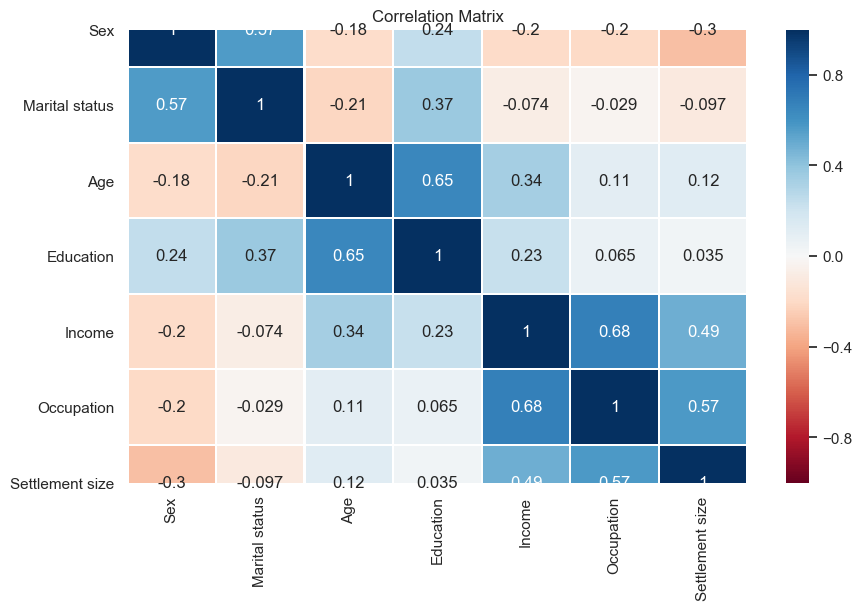

In [58]:
# df_segmentation.corr()
plt.figure(figsize = (10,6), dpi = 100)
s = sns.heatmap(df_segmentation.corr(),linewidths=1, annot =True, cmap = "RdBu", vmin=-1, vmax =1)
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 1.0, 'Viz of Raw Data')

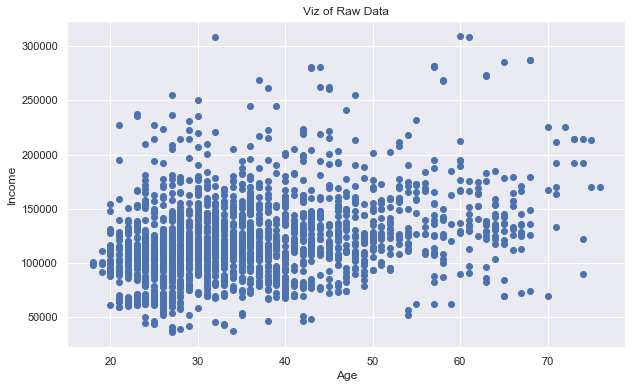

In [59]:
plt.figure(figsize = (10,6))
plt.scatter(x = df_segmentation['Age'], y= df_segmentation['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Viz of Raw Data')

In [60]:
#Standarizing 

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## K-Means Clustering

In [61]:
#choosing K
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 103, init = "k-means++")
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

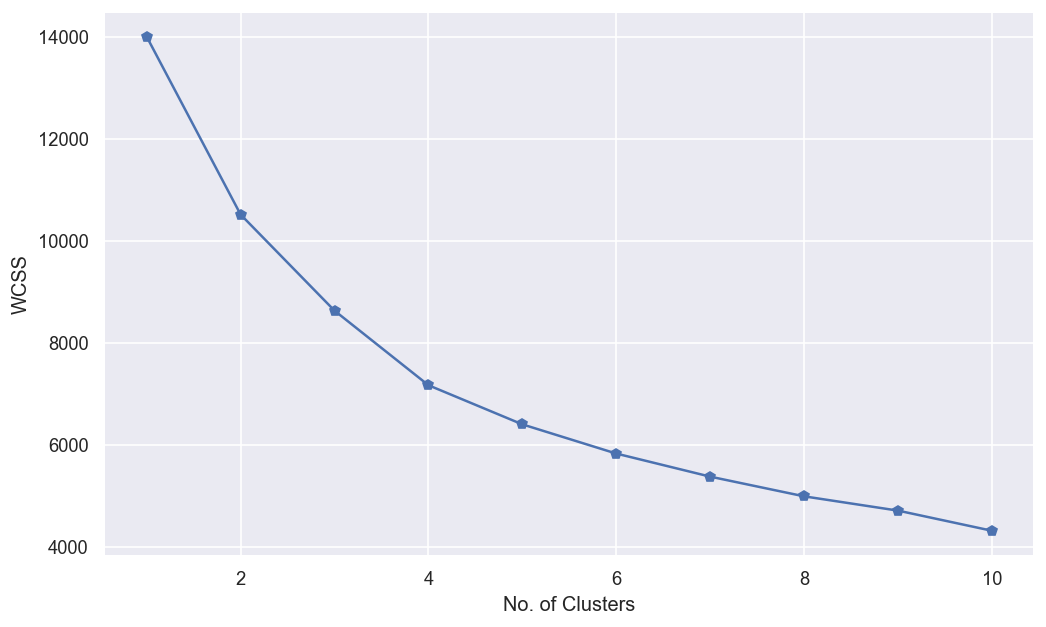

In [62]:
plt.figure(figsize = (10,6), dpi =120)
plt.plot(range(1,11), wcss, marker='p')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [63]:
#Observing through elbow method, 4 clusters looks best option
kmeans = KMeans(n_clusters = 4, random_state = 103, init = "k-means++")
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=103, tol=0.0001, verbose=0)

In [64]:
len(kmeans.labels_)

2000

In [65]:
df_seg_kmeans = df_segmentation.copy()
df_seg_kmeans['Segment kmeans'] = kmeans.labels_
df_seg_kmeans

df_seg_analysis = df_seg_kmeans.groupby(['Segment kmeans']).mean()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment kmeans,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290


In [66]:
df_seg_analysis['N Obs'] = df_seg_kmeans.groupby(['Segment kmeans'])
df_seg_analysis['N Obs'] = df_seg_kmeans.groupby(['Segment kmeans']).count()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs
Segment kmeans,,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
1,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462


In [67]:
df_seg_analysis['Prop Obs'] = df_seg_analysis['N Obs']/df_seg_analysis['N Obs'].sum()
df_seg_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment kmeans,,,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
1,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310


In [68]:
df_seg_analysis.rename({0: 'Standard',
                       1: 'Well-off',
                       2: 'Career Focused',
                       3: 'Fewer Opportunities'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment kmeans,,,,,,,,,
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Career Focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Fewer Opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310


In [69]:
df_seg_kmeans['Labels'] = df_seg_kmeans['Segment kmeans'].map({0: 'Standard',
                                                               1: 'Well-off',
                                                               2: 'Career Focused',
                                                               3: 'Fewer Opportunities'})

In [70]:
df_seg_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment kmeans,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,1,Well-off
100000002,1,1,22,1,150773,1,2,0,Standard
100000003,0,0,49,1,89210,0,0,3,Fewer Opportunities
100000004,0,0,45,1,171565,1,1,2,Career Focused
100000005,0,0,53,1,149031,1,1,2,Career Focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,3,Fewer Opportunities
100001997,1,1,27,1,117744,1,0,0,Standard
100001998,0,0,31,0,86400,0,0,3,Fewer Opportunities


[]

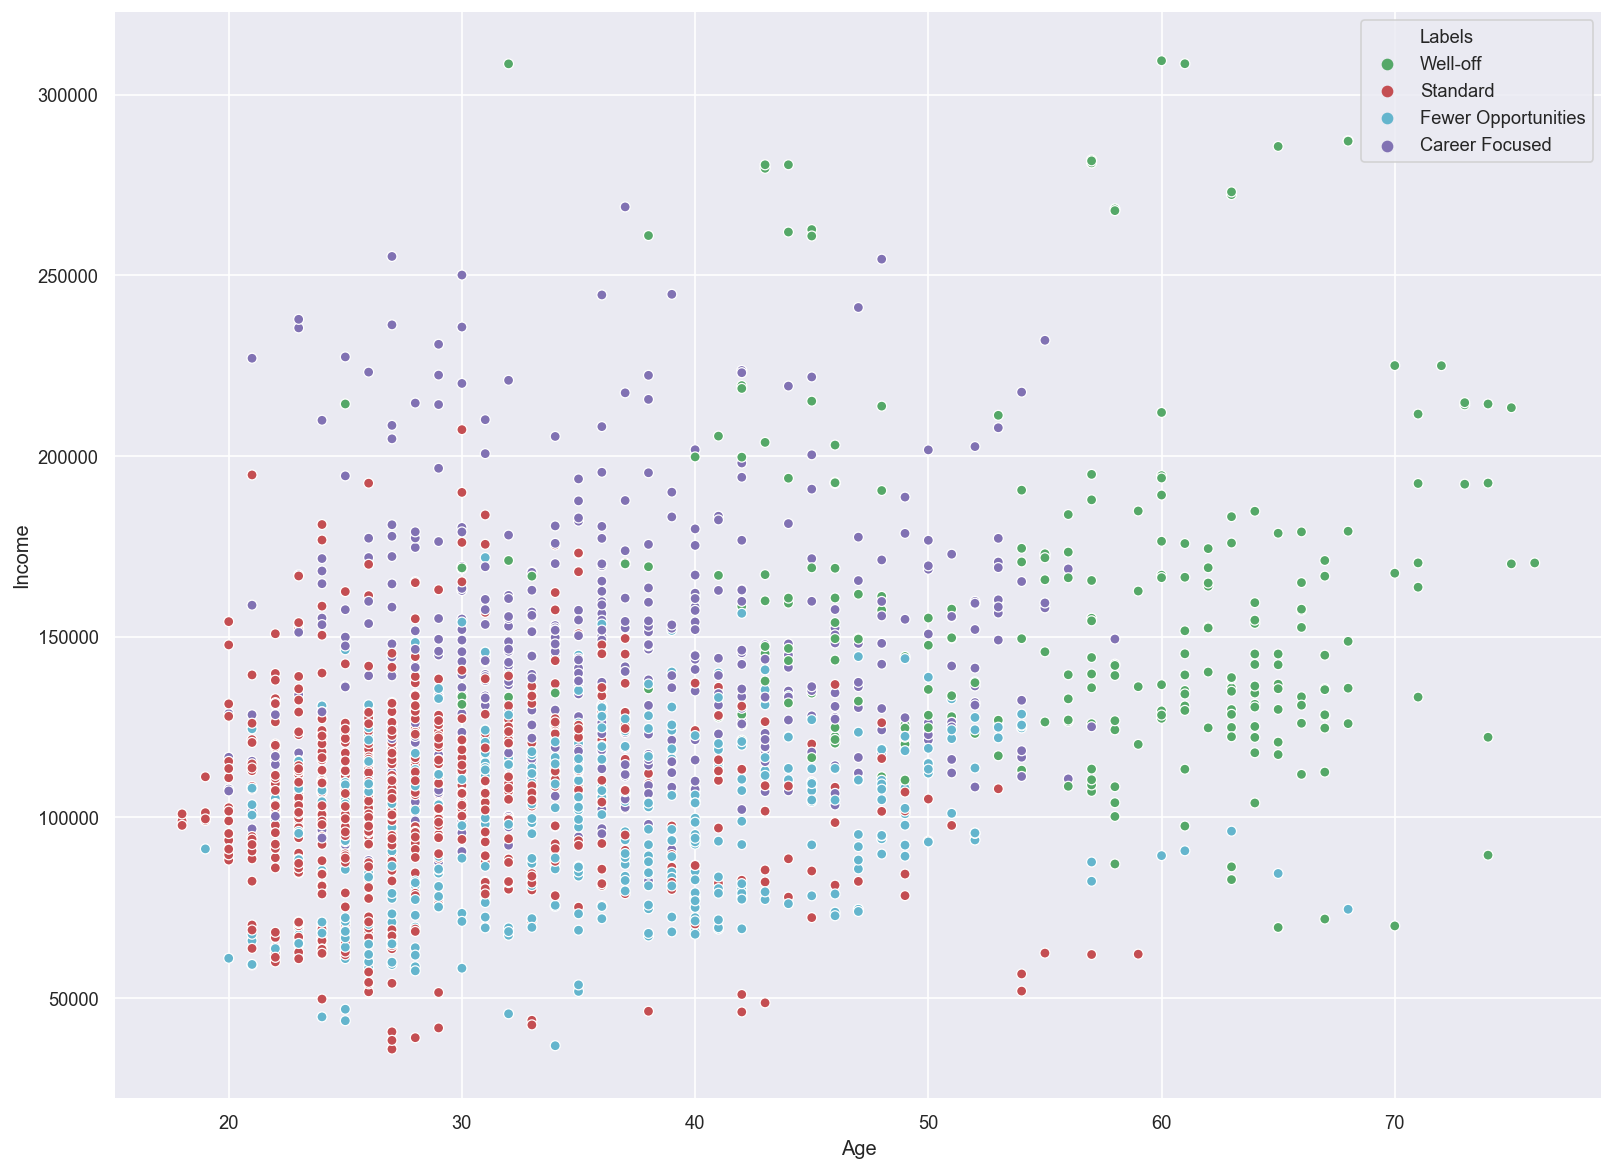

In [71]:
plt.figure(figsize = (16,12), dpi = 120)
sns.scatterplot(data=df_seg_kmeans, x='Age', y='Income', hue='Labels', palette=['g','r','c', 'm'])
plt.plot()

In [72]:
#The segments are not easily separable so we need to take need of PCA to reduce dimentions and apply K-Means Again

## PCA

In [73]:
pca = PCA()
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [74]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

[]

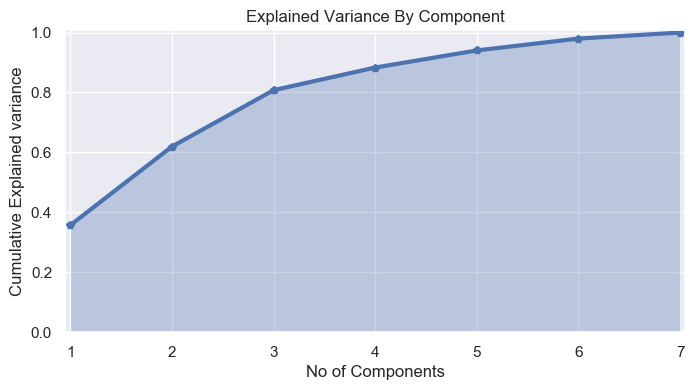

In [75]:
fig, ax = plt.subplots(figsize=(8,4),dpi=100)
ax.plot(range(1,8),pca.explained_variance_ratio_.cumsum() , color='b', lw=3, marker="p")
ax.fill_between(range(1,8), 0, pca.explained_variance_ratio_.cumsum(), alpha=.3)
ax.set(xlim=(0.95, 7.05), ylim=(0, 1.008), xticks=range(1,8))
plt.xlabel("No of Components")
plt.ylabel("Cumulative Explained variance")
plt.title("Explained Variance By Component")
plt.plot()

In [76]:
#By looking at "Explained Variance By Component" Plot, first 3 component looks perfect as it explains around 80% of variance
pca = PCA(n_components=3)
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## PCA Results

In [77]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [78]:
pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [79]:
scores_pca = pca.transform(segmentation_std)

## K-Means Clustering Using PCA

In [80]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, random_state = 103, init = "k-means++")
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

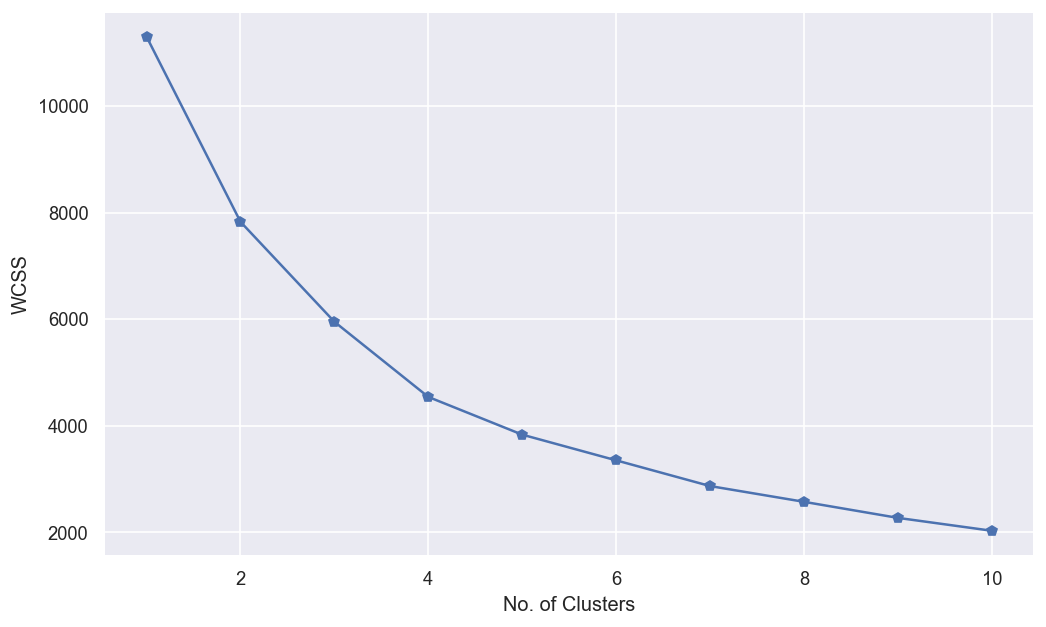

In [81]:
plt.figure(figsize = (10,6), dpi =120)
plt.plot(range(1,11), wcss, marker='p')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
#Observing through elbow method, 4 clusters looks best option again
kmeans_pca = KMeans(n_clusters = 4, random_state = 103, init = "k-means++")
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=103, tol=0.0001, verbose=0)

## K-Means with PCA Results

In [83]:
df_seg_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_seg_pca_kmeans.columns.values[-3: ] = ["Component 1","Component 2","Component 3"]
df_seg_pca_kmeans['Segment Kmeans PCA'] = kmeans_pca.labels_

In [84]:
df_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment Kmeans PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,1
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


In [85]:
df_seg_analysis_pca = df_seg_pca_kmeans.groupby(['Segment Kmeans PCA']).mean()
df_seg_analysis_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment Kmeans PCA,,,,,,,,,,
0,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
1,0.900145,0.966715,28.868307,1.060781,107518.545586,0.677279,0.441389,-1.108176,0.704722,-0.782855
2,0.308026,0.095445,35.314534,0.761388,93772.026030,0.253796,0.039046,-1.044804,-0.900895,1.001939
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [86]:
df_seg_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment Kmeans PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,1
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,1
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,1


In [87]:
df_seg_analysis_pca['N Obs'] = df_seg_pca_kmeans.groupby(['Segment Kmeans PCA'])
df_seg_analysis_pca['N Obs'] = df_seg_pca_kmeans.groupby(['Segment Kmeans PCA']).count()
df_seg_analysis_pca

df_seg_analysis_pca['Prop Obs'] = df_seg_analysis_pca['N Obs']/df_seg_analysis_pca['N Obs'].sum()
df_seg_analysis_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment Kmeans PCA,,,,,,,,,,,,
0,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325
1,0.900145,0.966715,28.868307,1.060781,107518.545586,0.677279,0.441389,-1.108176,0.704722,-0.782855,691,0.3455
2,0.308026,0.095445,35.314534,0.761388,93772.026030,0.253796,0.039046,-1.044804,-0.900895,1.001939,461,0.2305
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [88]:
df_seg_analysis_pca = df_seg_analysis_pca.rename({0: 'Well-off',
                                                  1: 'Standard',
                                                  2: 'Fewer Opportunities',
                                                  3: 'Career Focused',
                                                })

In [89]:
df_seg_analysis_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment Kmeans PCA,,,,,,,,,,,,
Well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325
Standard,0.900145,0.966715,28.868307,1.060781,107518.545586,0.677279,0.441389,-1.108176,0.704722,-0.782855,691,0.3455
Fewer Opportunities,0.308026,0.095445,35.314534,0.761388,93772.026030,0.253796,0.039046,-1.044804,-0.900895,1.001939,461,0.2305
Career Focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [90]:
df_seg_pca_kmeans['Legend'] = df_seg_pca_kmeans['Segment Kmeans PCA'].map({0: 'Well-off',
                                                  1: 'Standard',
                                                  2: 'Fewer Opportunities',
                                                  3: 'Career Focused',
                                                })

[]

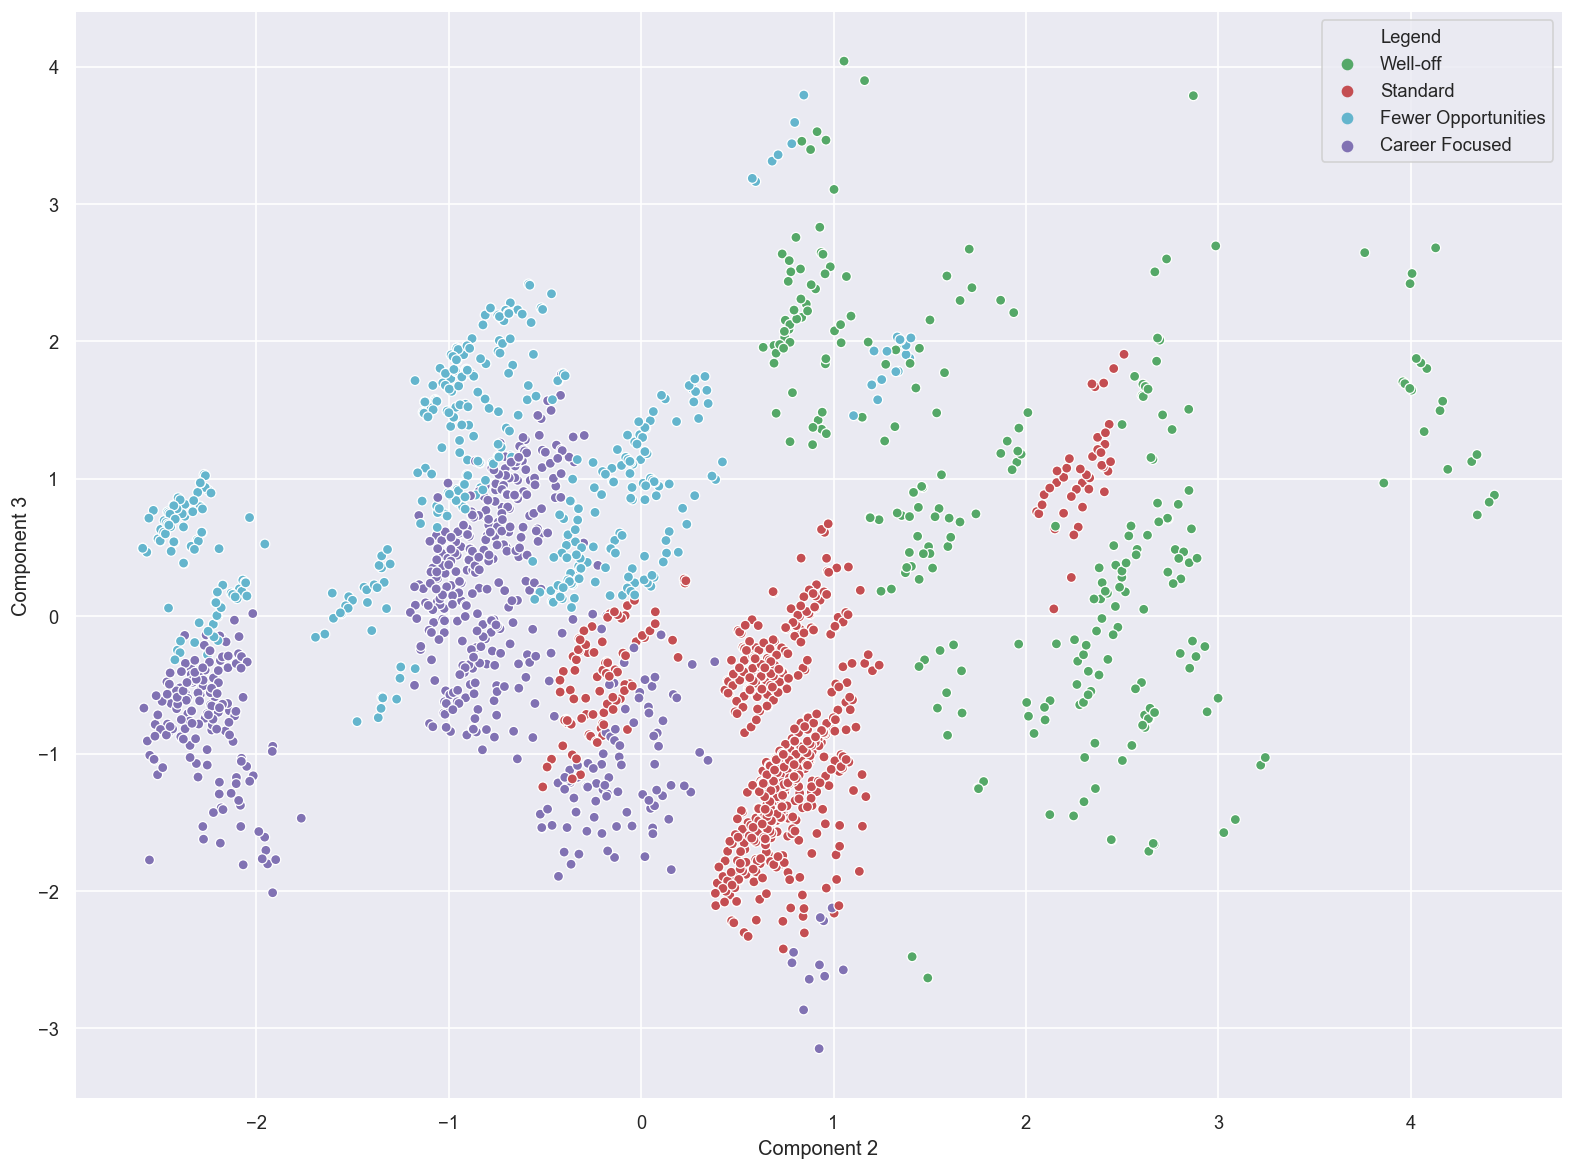

In [91]:
plt.figure(figsize = (16,12), dpi = 120)
sns.scatterplot(data=df_seg_pca_kmeans, x='Component 2', y='Component 3',hue='Legend' ,palette=['g','r','c', 'm'])
plt.plot()

## Exporting Data

In [92]:
pickle.dump(scaler, open('scaler.pickle', 'wb'))

In [93]:
pickle.dump(pca, open('pca.pickle', 'wb'))

In [94]:
pickle.dump(kmeans_pca, open('kmeans_pca.pickle', 'wb'))